# Tumor growth modeling

# 2. Tumor growth laws

**Problem:**

Considering $n$ volume observations $(V_1,\cdots,V_n)$ at time points $(t_1, \cdots, t_n)$, we would like to see whether these data could have been generated by a given function 
$$V: \begin{array}{ccc} \mathbb{R}\times \mathbb{R}^p & \longrightarrow & \mathbb{R} \\
				(t,\theta)            & \longmapsto    & V(t,\theta)\end{array}$$
depending on time $t$ and a vector of parameters $\theta\in \mathbb{R}^p$.

Another – closely related – problem is to find a set of parameters $\hat{\theta}$ that would "best" describe the data.

In our context a model will be the combination of two parts:
1. The structural model $V$ (deterministic)
2. An observation model linking the model to the observations (error model, stochastic)

The latter is defined by assuming that the observations were generated by the model plus some measurements error and we write
$$
V_j = V(t_j; \theta) + \sigma_j \varepsilon_j.
$$
where $\sigma_j\varepsilon_j$ describes the error term. It is natural to assume that this error term is gaussian, with expectation zero. $\sigma_j$ is the standard deviation of the error and the $\varepsilon_j$ are independent and identically distributed random variables with
$$
\varepsilon_j \sim \mathcal{N}(0, 1).
$$

*Error model*

An important assumption of the model is how does $\sigma_j$ depend on the volume. The first step would be to consider $\sigma_j$ as *constant* (i.e. independent of $j$), which would mean that for all the observations, the magnitude of the error is the same. However, it appears also reasonable to consider that from our measurement technique (calipers), larger tumors would result in larger errors. A natural assumption could then be a *proportional* error model described by $\sigma_j = \sigma V(t_j, \theta)$. In our case, a detailed study of 133 measurements that were performed twice on the same tumor established a slightly more refined model but we will assume a proportional error model for simplicity.

*Likelihood maximization*

A central concept in model fitting and parameter estimation is the notion of likelihood and likelihood maximization. The likelihood of the data is defined as the probability density function of the data, under the assumption it has been generated by the model $V$ with parameters $\theta$ and $\sigma$. Note that $\sigma$ is often unknown and is a parameter to be established. However in our analysis we could compute it from the analysis mentioned above and we will take here $\sigma = 0.1$ (10% error). From the formula above, under the independence and normality assumption we can compute it to get
$$
L(\theta) = p(V_1,\cdots,V_n;\theta)=\prod_{j=1}^n p(V_j ;\theta) = \prod_{j=1}^n \frac{1}{\sigma_j\sqrt{2 \pi}}e^{-\frac{\left(V_j - V(t_j,\theta)\right)^2}{2\sigma_j^2}}
$$
At this point, it is natural to consider the log-likelihood $l(\theta, \sigma)=\ln\left(L(\theta)\right)$ to simplify the calculations. We get
\begin{align}
l(\theta) & = - \sum_{j= 1}^{n} \frac{\left(V_j - V(t_j,\theta)\right)^2}{2\sigma_j^2} - \sum_{j=1}^n \ln(\sigma_j) - n \ln(\sqrt{2\pi}) \\
l(\theta) & = - \sum_{j= 1}^{n} \frac{\left(V_j - V(t_j,\theta)\right)^2}{2\sigma^2 V(t_j, \theta)^2} - n \ln(\sigma) - \sum_{j=1}^n \ln(V(t_j,\theta)) - n \ln(\sqrt{2\pi})
\end{align}
To simplify further, we will replace $V(t_j, \theta)$ by the observation $V_j$ in the terms above coming from the error model (third term and denominator in the first sum). The maximization of the log-likelihood then becomes equivalent to the following weighted least squares minimization problem (the $\sigma$s can be removed because they don't change the minimization problem):
$$
\hat{\theta} = \underset{\theta}{\rm argmin}\left|\left|\frac{V-V(t;\theta)}{V}\right|\right|_2^2.
$$
where $V = (V_1, \cdots, V_n)$, $V(t;\theta) = (V(t_1; \theta), \cdots, V(t_n; \theta))$ and $||\cdot||_2$ is the discrete $L^2$ norm (sum of squares).

Import modules and load the data

In [1]:
% matplotlib inline
%precision %.3g

'%.3g'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df   = pd.read_excel('data_table.xlsx')
time = df.index.values

## 2.1 Proliferation and the exponential model
We will first explore the validity of the exponential growth model to test what was observed by plotting the curves. The model is defined by a constant length of the cell cycle (thus a constant doubling time) for a constant fraction of the tumor volume. In equations, this translates into
$$
\left\lbrace\begin{array}{l}
\frac{dV}{dt} = \alpha V\\
V(t=0) = V_0
\end{array}
\right.
\quad 
\Longrightarrow
\quad
V(t) = V_0 e^{\alpha t}
$$
where $V_0$ is the initial volume and $\alpha$ is the proliferation rate, defined by $\alpha=\frac{\ln(2)}{\tau}$ with $\tau$ the length of the cell cycle.

Define a python function ``exponential_V0`` taking a time vector ``time`` and a vector of parameters ``param`` as input (in this order) and giving the exponential model value as output.

In [4]:
def exponential_V0(time, alpha, V0):
    V     = V0*np.exp(alpha*time)
    return V

By manual exploration of the parameters and plotting the first mouse growth data together with model simulations, test different values of the parameters that would best describe the data

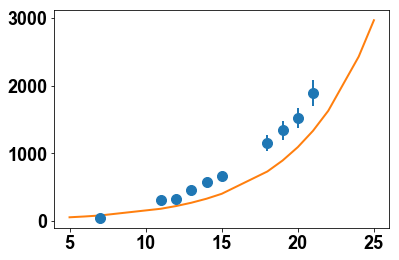

In [5]:
alpha = 0.2
V0    = 20
V     = exponential_V0(time, alpha, V0)
plt.errorbar(df.index, df[1], 0.1*df[1], fmt='o')
plt.plot(time, V)

Using the function ``curve_fit`` from the module ``scipy.optimize``, find the parameters $\hat{\alpha}^1$ and $\hat{V_0}^1$ that best fit the data of the first mouse. 

In [6]:
from scipy.optimize import curve_fit

To get the data vector with no nan and corresponding time vector, use (example with $j=1$)

In [7]:
time_1 = time[~np.isnan(df[1])]
data_1 = df[1][~np.isnan(df[1])]

In [8]:
popt, pcov = curve_fit(exponential_V0, time_1, data_1, [alpha, V0], sigma=0.1*data_1)
print('alpha_opt = %.3g' %popt[0])
print('V0_opt = %.3g' %popt[1])

alpha_opt = 0.248
V0_opt = 12.4


Plot the resulting curve and data (with 10% error bar). Plot the model curve from day 0. What would you conclude in terms of the validity of the model?

Text(0,0.5,'Volume (mm^3)')

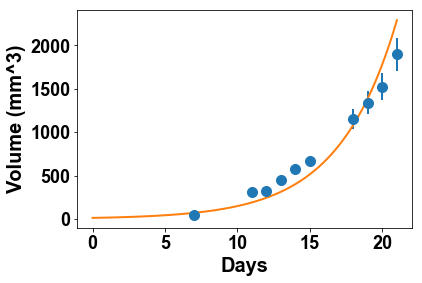

In [9]:
time_plot = np.linspace(0, time_1[-1], 1000)
V_plot    = exponential_V0(time_plot, popt[0], popt[1])
plt.errorbar(df.index, df[1], 0.1*df[1], fmt='o')
plt.plot(time_plot, V_plot)
plt.xlabel('Days')
plt.ylabel('Volume (mm^3)')

Plot the curve in log scale  with ``plt.yscale('log')`` and set the limits of the y axis to (1, 2500) with ``plt.ylim(1, 2500)``. Remembering that at day 0 $10^6$ cells (equivalent to 1 mm$^3$) were injected in the animal, what do you think of the plausibility of the model for the entire duration of the experiment?

(1, 2500)

/Users/benzekry/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


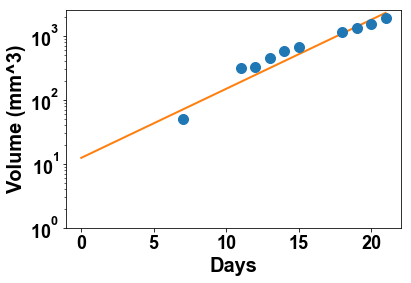

In [10]:
plt.figure(2)
plt.errorbar(df.index, df[1], 0.1*df[1], fmt='o')
plt.plot(time_plot, V_plot)
plt.xlabel('Days')
plt.ylabel('Volume (mm^3)')
plt.yscale('log')
plt.ylim(1, 2500)

Repeat this for all the mice (use a ``for`` loop) but plot only in log scale. What do you conclude from the values of $V_0$ obtained and the plots?

alpha_opt = 0.248
V0_opt = 12.4
alpha_opt = 0.215
V0_opt = 20.8
alpha_opt = 0.223
V0_opt = 24.2
alpha_opt = 0.208
V0_opt = 12.9
alpha_opt = 0.222
V0_opt = 16.8
alpha_opt = 0.27
V0_opt = 10.3
alpha_opt = 0.26
V0_opt = 20.5
alpha_opt = 0.226
V0_opt = 18
alpha_opt = 0.273
V0_opt = 5.37
alpha_opt = 0.238
V0_opt = 9


/Users/benzekry/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


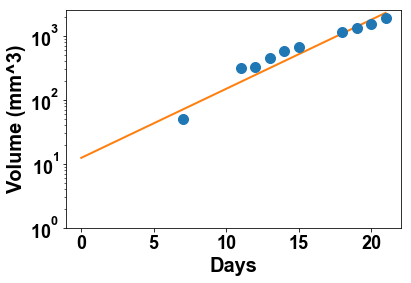

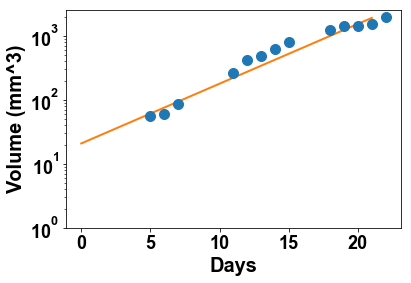

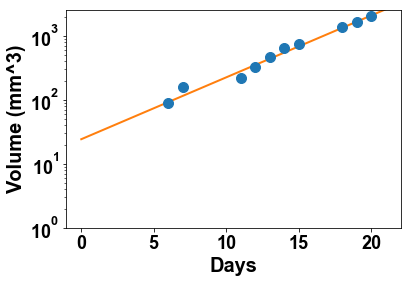

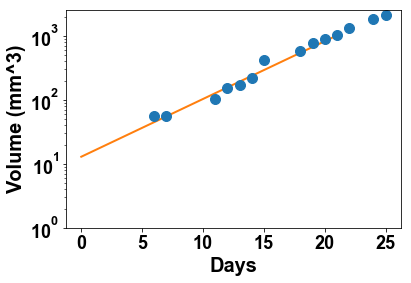

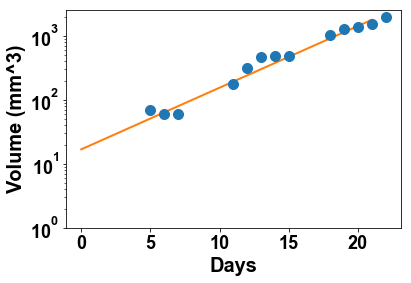

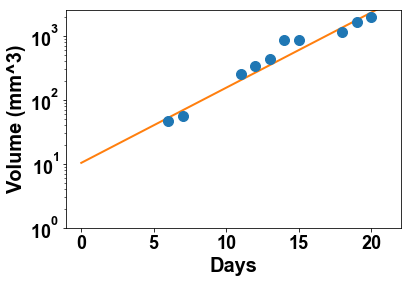

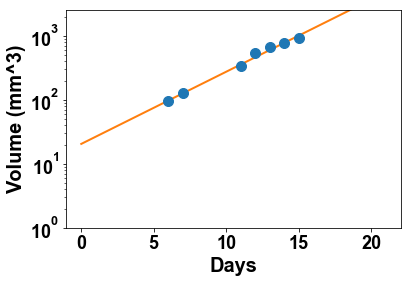

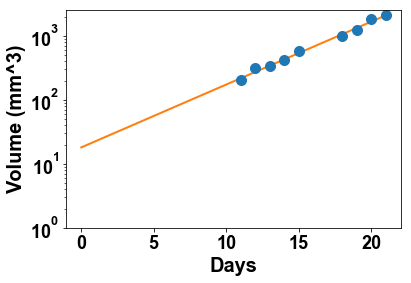

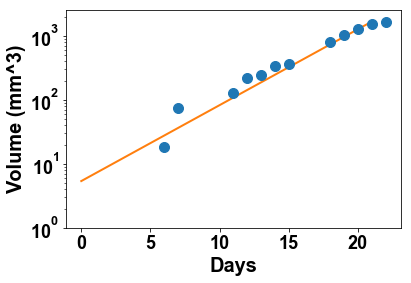

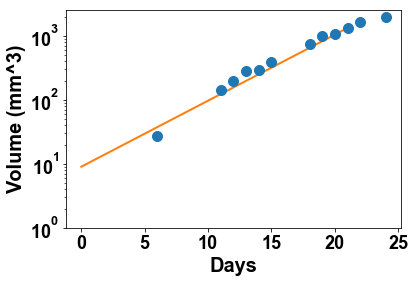

In [11]:
for mouse in range(1, 11):
    time_loc   = time[~np.isnan(df[mouse])]
    data_loc   = df[mouse][~np.isnan(df[mouse])]
    popt, pcov = curve_fit(exponential_V0, time_loc, data_loc, [alpha, V0], sigma=0.1*data_loc)
    print('alpha_opt = %.3g' %popt[0])
    print('V0_opt = %.3g' %popt[1])
    V_plot     = exponential_V0(time_plot, popt[0], popt[1])
    plt.figure(mouse)
    plt.errorbar(df.index, df[mouse], 0.1*df[mouse], fmt='o')
    plt.plot(time_plot, V_plot)
    plt.xlabel('Days')
    plt.ylabel('Volume (mm^3)')
    plt.yscale('log')
    plt.ylim(1, 2500)

To test this further, let's use the information on the number of injected cells as an initial condition and define another model, named ``exponential`` defined by
$$
\left\lbrace\begin{array}{l}
\frac{dV}{dt} = \alpha V\\
V(t=0) = 1
\end{array}
\right.
\quad 
\Longrightarrow
\quad
V(t) = e^{\alpha t}
$$

In [12]:
def exponential(time, alpha):
    return np.exp(alpha*time)

alpha_opt = 0.377
alpha_opt = 0.361
alpha_opt = 0.399
alpha_opt = 0.324
alpha_opt = 0.362
alpha_opt = 0.397
alpha_opt = 0.479
alpha_opt = 0.38
alpha_opt = 0.358
alpha_opt = 0.338


/Users/benzekry/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


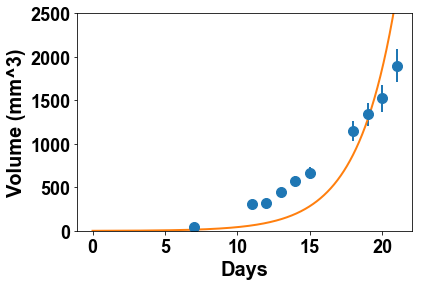

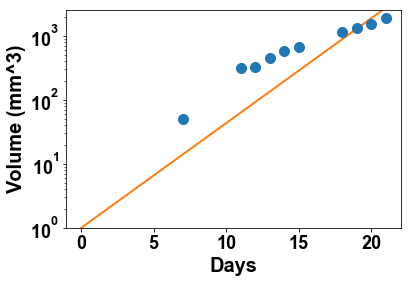

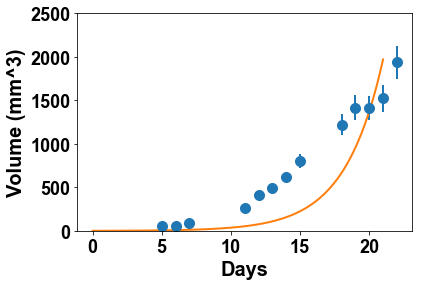

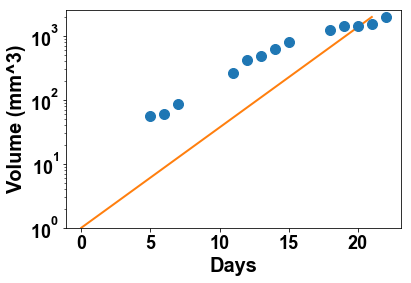

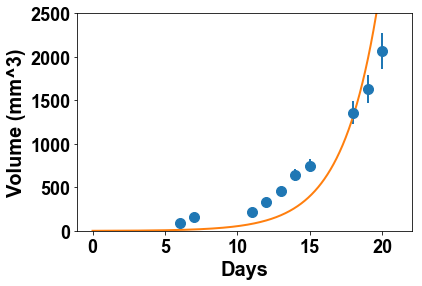

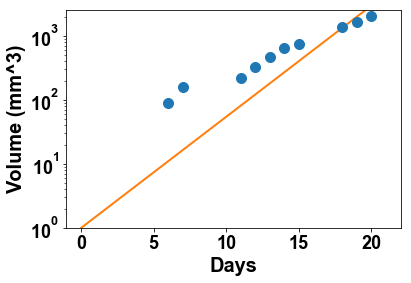

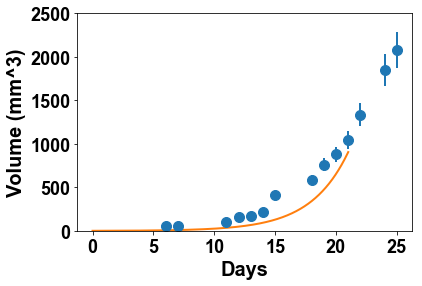

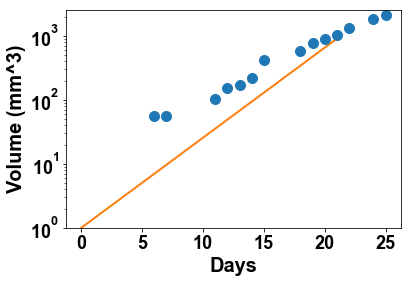

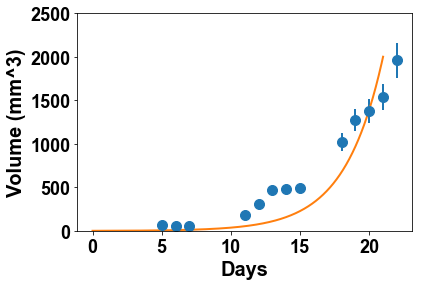

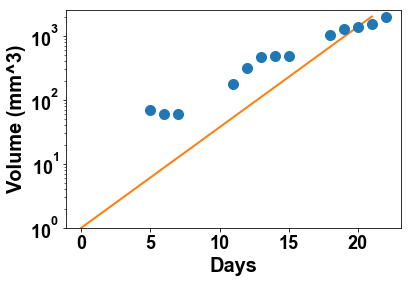

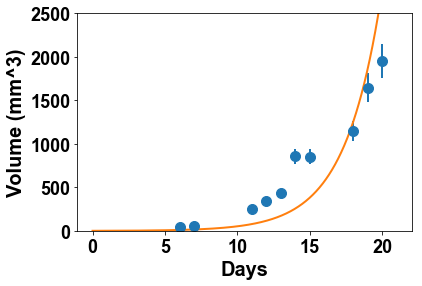

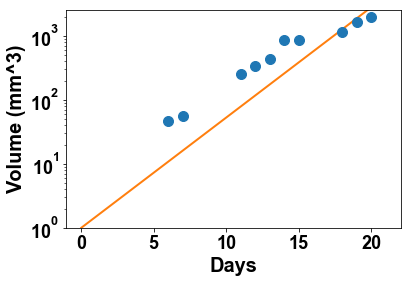

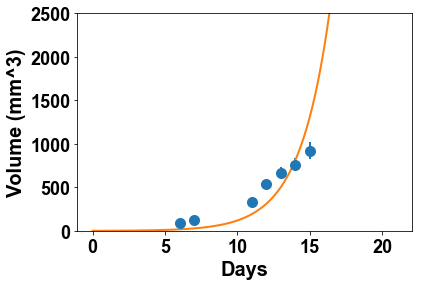

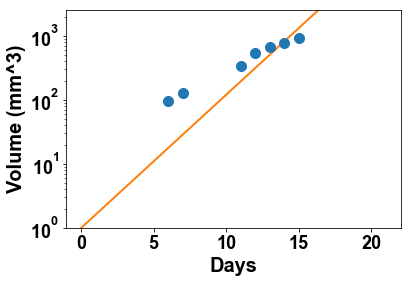

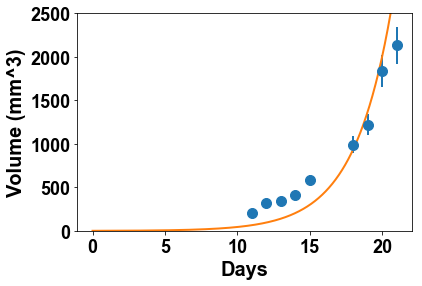

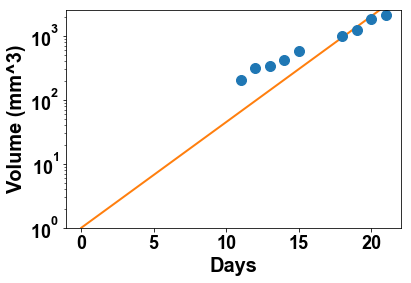

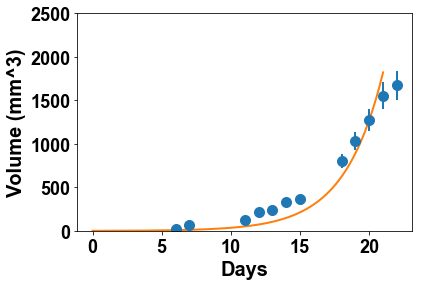

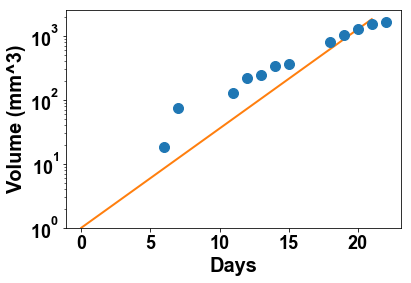

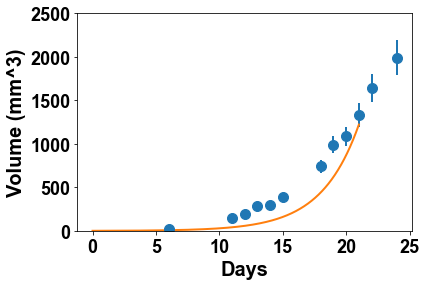

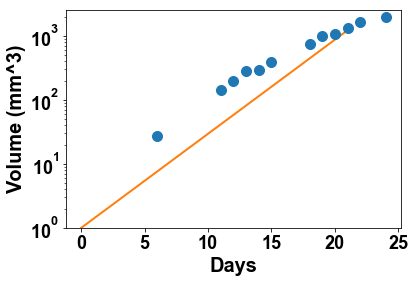

In [13]:
for mouse in range(1, 11):
    time_loc   = time[~np.isnan(df[mouse])]
    data_loc   = df[mouse][~np.isnan(df[mouse])]
    popt, pcov = curve_fit(exponential, time_loc, data_loc, alpha, sigma=0.1*data_loc)
    print('alpha_opt = %.3g' %popt[0])
    V_plot     = exponential(time_plot, popt[0])
    plt.figure(2*mouse)
    plt.errorbar(df.index, df[mouse], 0.1*df[mouse], fmt='o')
    plt.plot(time_plot, V_plot)
    plt.xlabel('Days')
    plt.ylabel('Volume (mm^3)')
    plt.ylim(1, 2500)
    plt.figure(2*mouse+1)
    plt.errorbar(df.index, df[mouse], 0.1*df[mouse], fmt='o')
    plt.plot(time_plot, V_plot)
    plt.xlabel('Days')
    plt.ylabel('Volume (mm^3)')
    plt.yscale('log')
    plt.ylim(1, 2500)

## 2.2 Competition and the logistic model
The above observations demonstrated that the tumor growth had to be faster than their actual growth rate during the observation phase, if starting from $V(t=0) = 1$ mm$^3$. This suggests to look for models that would exhibit such growth deceleration. In ecology, when modeling the growth of a population, a famous model for explaining growth deceleration and saturation is the logistic model. A tumor being a population of cells, it appears natural to test this model against our data. The logistic model states that the individuals (here the tumor cells) would compete for nutrients or space. Introducing the concept of *carrying capacity* $K$ as the maximal reachable size for the population, the fraction of cells able to divide is then $1-\frac{V}{K}$ and the model writes
$$
\left\lbrace\begin{array}{l}
\frac{dV}{dt} = \alpha V\left(1 - \frac{V}{K}\right)\\
V(t=0) = 1
\end{array}
\right.
\quad 
\Longrightarrow
\quad
V(t) = \frac{K}{1+(K-1)e^{-\alpha t}}.
$$

Define a python function ``logistic`` for simulation of this model

In [14]:
def logistic(time, alpha, K):
    V = K/(1+(K-1)*np.exp(-alpha*time))
    return V

Define a function ``fit_all_mice`` that takes as input a model function and initial parameters, fits the model to the 10 individual tumor growth kinetics and plots these fits both in arithmetic and logarithmic scale. Set the option ``maxfev=10000`` when calling ``curve_fit``.

In [15]:
def fit_all_mice(model_f, param0):
    for mouse in range(1, 11):
        time_loc   = time[~np.isnan(df[mouse])]
        data_loc   = df[mouse][~np.isnan(df[mouse])]
        popt, pcov = curve_fit(model_f, time_loc, data_loc, param0, sigma=0.1*data_loc, maxfev=10000)
        print(popt)
        time_plot  = np.linspace(0, time_loc[-1], 1000)
        V_plot     = model_f(time_plot, *popt)
        plt.figure(2*mouse)
        plt.errorbar(df.index, df[mouse], 0.1*df[mouse], fmt='o')
        plt.plot(time_plot, V_plot)
        plt.xlabel('Days')
        plt.ylabel('Volume (mm^3)')
        plt.ylim(1, 2500)
        plt.figure(2*mouse+1)
        plt.errorbar(df.index, df[mouse], 0.1*df[mouse], fmt='o')
        plt.plot(time_plot, V_plot)
        plt.xlabel('Days')
        plt.ylabel('Volume (mm^3)')
        plt.yscale('log')
        plt.ylim(1, 2500)

Apply it to the logistic model with initial parameters $\alpha = 0.5$ and $K = 5000$. What do you think of the visual accuracy of the fits? Comment also on the plausibility of the inferred values of $K$.

[  5.03860131e-01   1.44964365e+03]
[  5.27244972e-01   1.41192700e+03]
[  4.99815175e-01   1.75627985e+03]
[  4.08117450e-01   1.43174842e+03]
[  4.84841337e-01   1.39187850e+03]
[  5.17437787e-01   1.52860872e+03]
[   0.72430748  588.50815217]
[  4.65311047e-01   1.66158324e+03]
[  4.37049763e-01   1.50147207e+03]
[  4.34415244e-01   1.47095044e+03]


/Users/benzekry/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


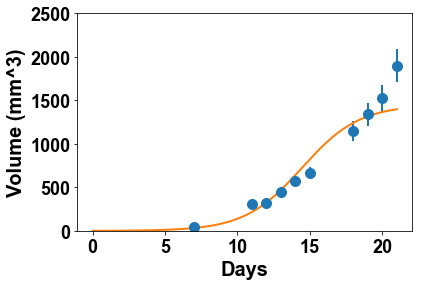

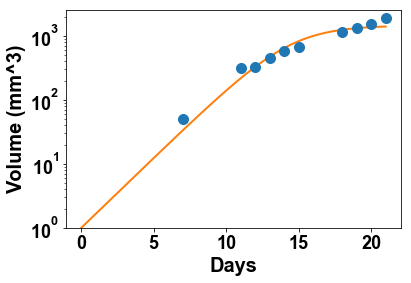

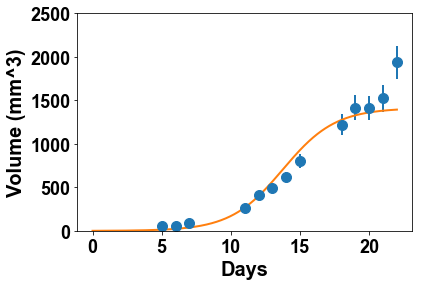

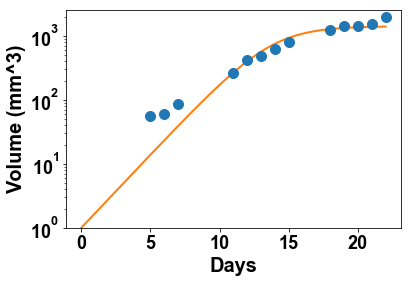

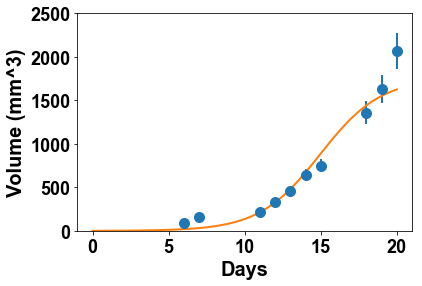

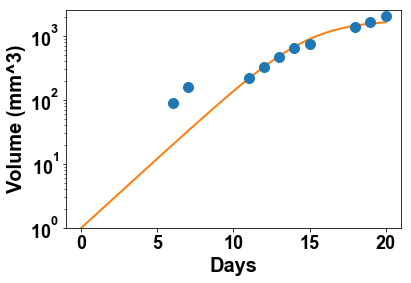

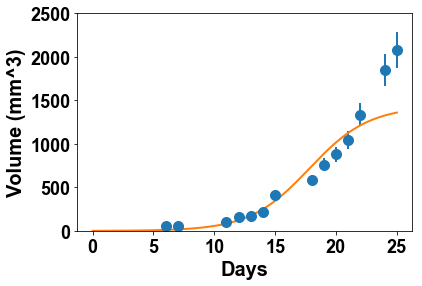

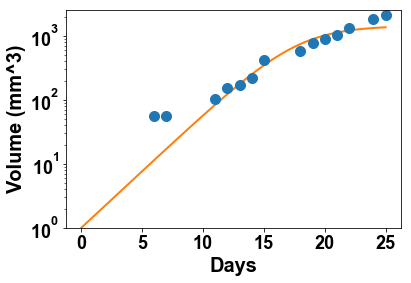

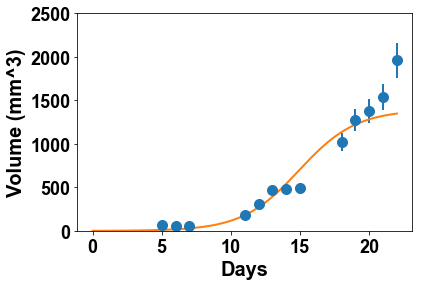

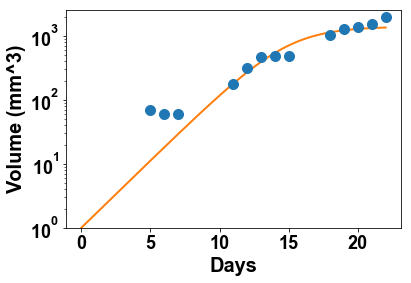

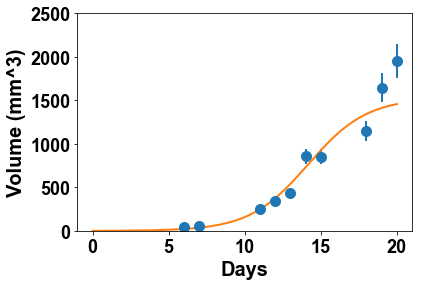

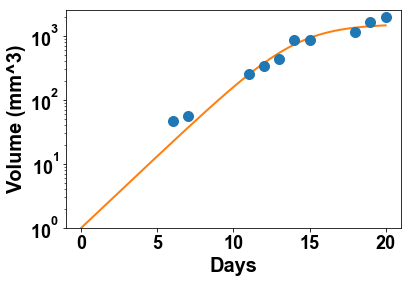

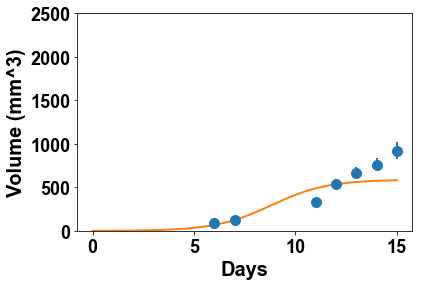

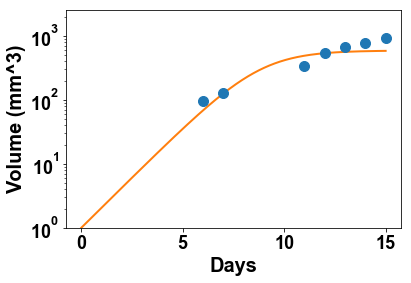

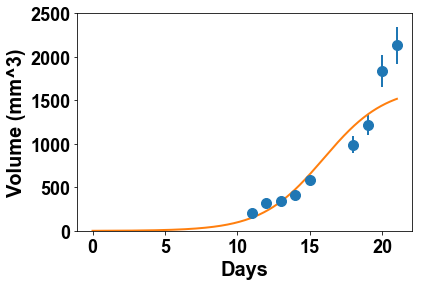

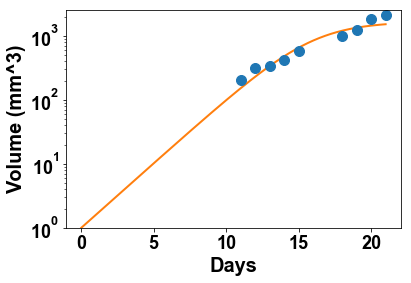

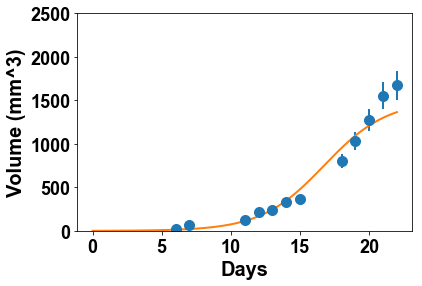

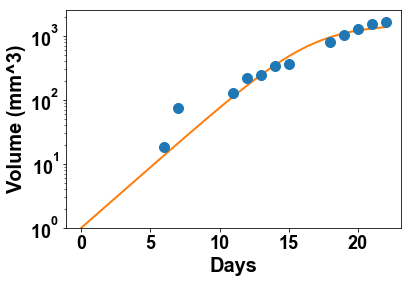

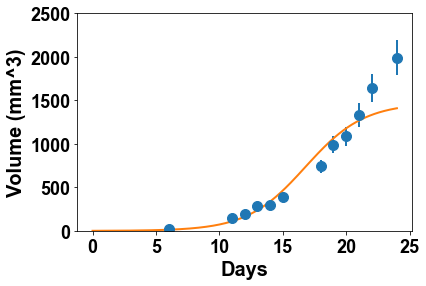

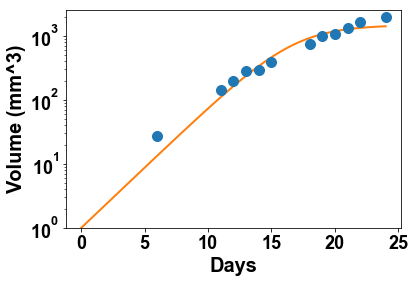

In [16]:
alpha = 0.5
K     = 5000
fit_all_mice(logistic, [alpha, K])

## 2.3 The generalized logistic model and standard errors on the parameters estimates

The previous results suggest that the logistic model is still not great at describing the entire growth curves. This motivates us to consider an even more flexible sigmoidal model: the generalized logistic model. It consists in modulating the strength of the competition through a power $\gamma$ and writes:
$$
\left\lbrace\begin{array}{l}
\frac{dV}{dt} = \alpha V\left(1 - \left(\frac{V}{K}\right)^\gamma\right)\\
V(t=0) = 1
\end{array}
\right.
\quad 
\Longrightarrow
\quad
V(t) = \frac{K}{\left(1+(K^\gamma-1)e^{-\alpha\gamma t}\right)^{\frac{1}{\gamma}}}.
$$

Write a model function ``generalized_logistic`` for simulation of this model

In [17]:
def generalized_logistic(time, alpha, K, gamma):
    V = K/(1+(K**gamma - 1)*np.exp(-alpha*gamma*time))**(1/gamma)
    return V

Fit this model to the data of the 10 mice. What do you conclude in terms of descriptive power of this model?

/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


[  9.13445953e-01   3.44857761e+03   1.64066691e-01]
[  1.23021097e+03   3.32848996e+03   9.23848347e-05]
[  8.75835301e+02   6.92673511e+03   1.05991862e-04]
[  5.99914067e+02   1.46546498e+04   1.03289104e-04]
[  9.30083585e+02   4.95956354e+03   1.00358141e-04]
[  3.72231243e+01   9.87796617e+03   2.29680038e-03]
[  9.37274737e+02   2.04588510e+03   1.52731587e-04]
[  4.19365169e+02   1.75620084e+04   1.67670507e-04]
[  1.51656593e+02   2.53719159e+04   3.98436798e-04]
[  5.39765585e+02   1.24205385e+04   1.26371918e-04]


/Users/benzekry/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


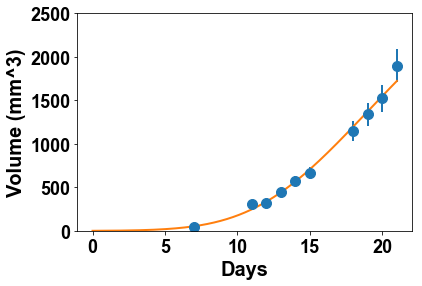

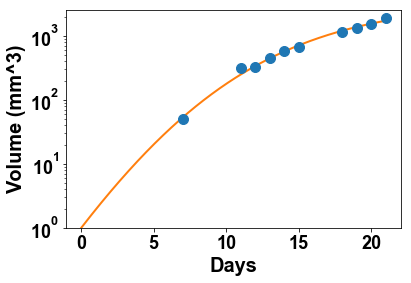

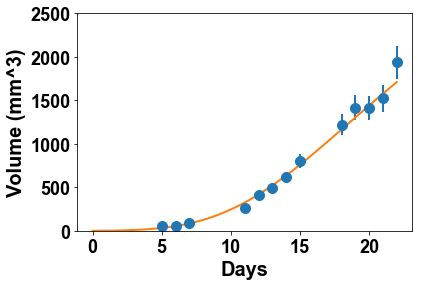

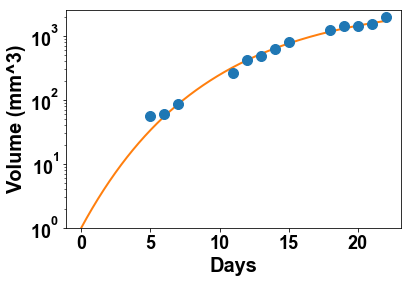

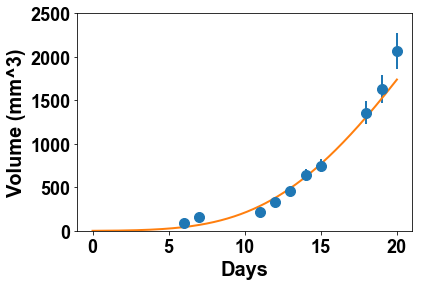

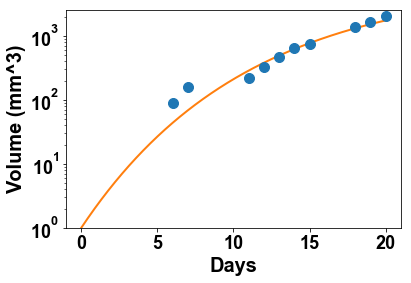

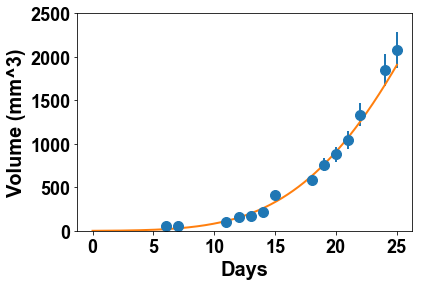

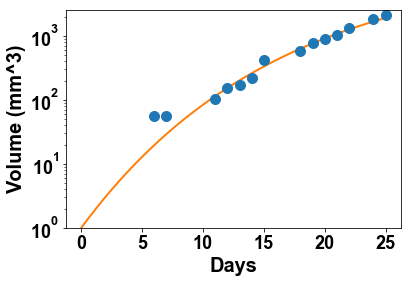

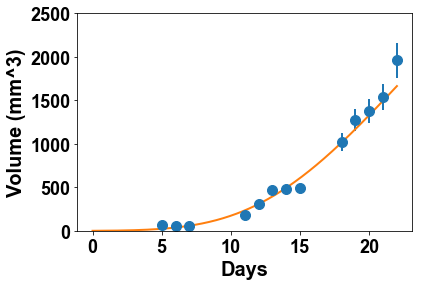

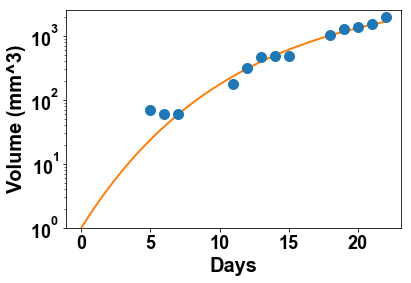

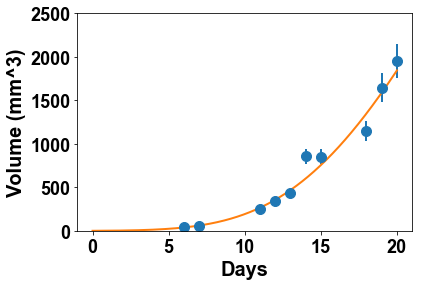

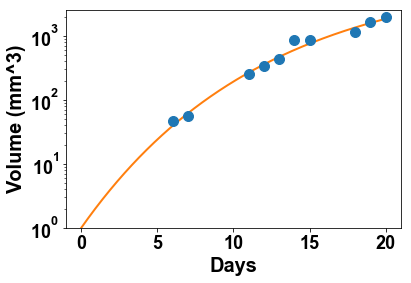

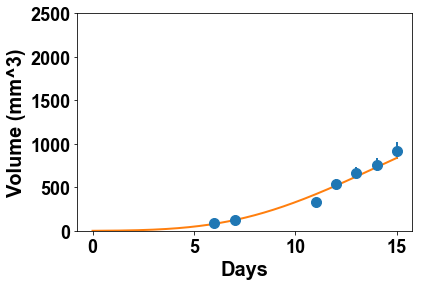

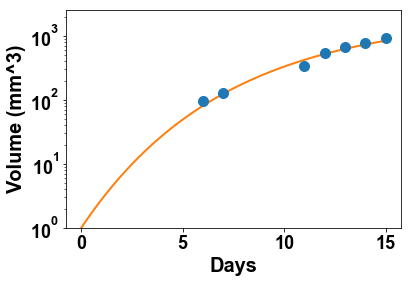

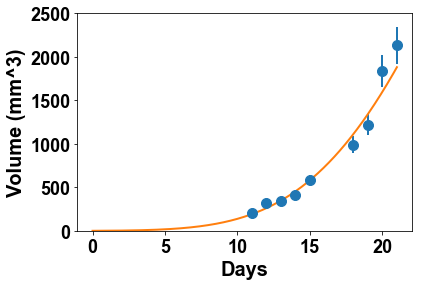

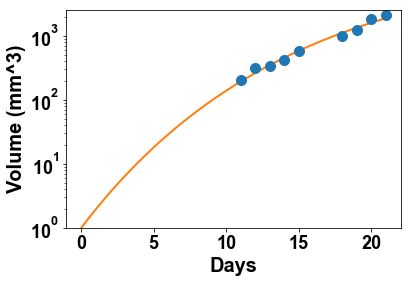

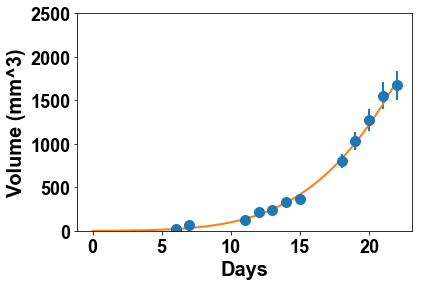

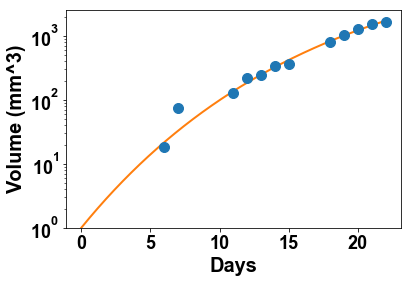

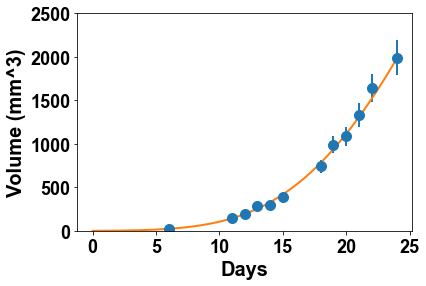

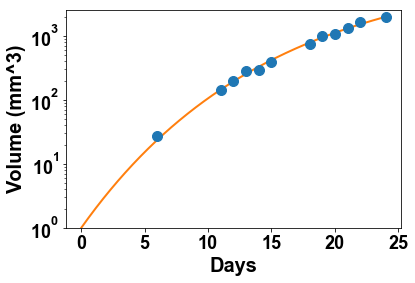

In [18]:
fit_all_mice(generalized_logistic, [0.5, 5000, 0.1])

The improvement of this model as compared to the logistic model is notable. However, the cost for this has been to add a parameter to the model. How do we know that we are not overfitting now? In other words, isn't it too easy to fit the growth curves with three parameters. This is linked to the question of **identifiability** of the parameters. The theory of maximimum likelihood estimation (MLE) offers great tools for such a purpose. Specifically, from its definition the MLE estimator is a **random variable**. As such, it has a distribution coming from the fact that the data itself is uncertain. For a single parameter, the standard deviation of this distribution is called the **standard error**. An important property of the MLE estimator $\hat{\theta}$ is that it is asymptotically normally distributed and its asymptotic covariance matrix $C$ can be estimated from the combination of : 1) the (estimated) variance of the measurement error $\hat{\sigma}^2$ and 2) the jacobian matrix of the model evaluated in $\hat{\theta}$. Specifically, denoting $J$ the (weighted) jacobian matrix of the model, one can show that asymptotically
$$
\hat{\theta} \sim \mathcal{N}\left(\theta^*, \hat{\sigma}^2\left(J\cdot J^T\right)^{-1}\right)
$$
where $\theta^*$ is the true value assumed to have generated the data (which we are estimating with $\hat{\theta}$). I invite you to think two minutes about why the presence of $\hat{\sigma}$ as a proportional term and $J$ as an inversely proportional term make sense. From $C$ the standard error ($se$) and relative standard error (rse) on parameter $p$ are defined by
$$
se\left(\hat{\theta}^p\right) = \sqrt{C_{p,p}} \quad rse\left(\hat{\theta}^p\right) = \frac{se\left(\hat{\theta}^p\right)}{\hat{\theta}^p}\times 100
$$

Luckily, this covariance matrix is automatically calculated by ``curve_fit`` and given as a second output. Define a new function ``fit_all_mice_analysis`` which does not plot the fits but instead gives as output a dictionary with two entries: two $10\times p$ array:  ``popts`` for all the estimated parameters in the 10 mice and ``rel_standard_errors`` of standard errors.

In [69]:
def fit_all_mice_analysis(model_f, param0):
    popts               = np.zeros([10, len(param0)])
    rel_standard_errors = np.zeros([10, len(param0)])
    SSEs                = np.zeros(10)
    AICs                = np.zeros(10)
    BICs                = np.zeros(10)
    results             = dict()
    for mouse in range(1, 11):
        time_loc                        = time[~np.isnan(df[mouse])]
        data_loc                        = df[mouse][~np.isnan(df[mouse])]
        popt, pcov                      = curve_fit(model_f, time_loc, data_loc, param0, sigma=0.1*data_loc, maxfev=10000)
        popts[mouse-1, :]               = popt
        rel_standard_errors[mouse-1, :] = np.sqrt(np.diag(pcov))/popt*100
        V                               = model_f(time_loc, *popt)
        SSE                             = np.sum(((V-data_loc)/V)**2)
        SSEs[mouse-1]                   = SSE
        n                               = len(data_loc)
        p                               = len(param0)
        AICs[mouse-1]                   = n*np.log(SSE/n) + 2*p
        BICs[mouse-1]                   = n*np.log(SSE/n) + p*np.log(n)
    results['popts']               = popts
    results['rel_standard_errors'] = rel_standard_errors
    results['SSEs']                = SSEs
    results['AICs']                = AICs
    results['BICs']                = BICs
    return results

Apply it to the ``exponential``, ``logistic`` and ``generalized_logistic model``. What do you think of the identifiability of these models?

In [37]:
float_formatter = lambda x: "%.3g" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
results   = fit_all_mice_analysis(exponential, [alpha])
print(results['rel_standard_errors'])
results   = fit_all_mice_analysis(logistic, [alpha, K])
print(results['rel_standard_errors'])
results = fit_all_mice_analysis(generalized_logistic, [alpha, K, 0.1])
print(results['rel_standard_errors'])

[[3.43]
 [3.89]
 [3.67]
 [2.85]
 [3.48]
 [3.63]
 [3.94]
 [2.73]
 [2.75]
 [2.99]]
[[2.59 13.2]
 [4.2 18.4]
 [4.66 30.7]
 [3.83 22.9]
 [4.64 23.8]
 [3.15 18.7]
 [6.78 18.1]
 [2.67 16.9]
 [3.08 20.3]
 [2.66 15.1]]


/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


[[34.9 35.1 61.6]
 [6.75e+04 31.1 6.75e+04]
 [2.3e+05 192 2.3e+05]
 [1.81e+05 234 1.81e+05]
 [1.67e+05 128 1.67e+05]
 [7.25e+03 158 7.33e+03]
 [2.42e+05 162 2.42e+05]
 [1.42e+05 252 1.42e+05]
 [6.36e+04 397 6.37e+04]
 [3.98e+04 52.8 3.99e+04]]


# 2.4 The "magical" Gompertz model

Looking at the values of the parameter $\gamma$ in the generalized logistic model, we see that its value was identified to be very small. When $\gamma$ tends to zero, the expression obtained is equal to the very popular Gompertz model, which can be expressed by the following differential equation and analytical expression:
$$
\left\lbrace\begin{array}{l}
\frac{dV}{dt} = \left(\alpha_0 - \beta\ln\left(\frac{V}{V_c}\right)\right)V\\
V(t=0) = 1
\end{array}\right.
\quad 
\Rightarrow
\quad
V(t) = V_c\left(\frac{V_I}{V_c}\right)^{e^{-\beta t}}e^{\frac{\alpha_0}{\beta}\left(1-e^{-\beta t}\right)}
$$
where $V_c$ is the volume of one cell (a constant equal to $10^{-6}$), $\alpha_0$ is the proliferation rate at one cell and $\beta$ is the rate of exponential decrease of the relative growth rate. Indeed, one can show that the equation above is equivalent to 
$$
\left\lbrace\begin{array}{l}
\frac{dV}{dt} = \alpha_1 e^{-\beta t}V\\
V(t=0) = 1
\end{array}\right.
$$
with $\alpha_1=\alpha_0 +\beta \ln(V_c)$.

This model is implemented in the following function

In [44]:
def gompertz(time, alpha0, beta):
    Vc = 1e-6
    VI = 1
    V  = Vc*(VI/Vc)**(np.exp(-beta*time))*np.exp(alpha0/beta*(1-np.exp(-beta*time)))
    return V

Fit this model to the data and assess (visually) the goodness of fit. Take $\alpha_0 = 0.1$ and $\beta = 0.01$ as initial conditions.

[1.96 0.0859]
[2.49 0.114]
[2.1 0.0928]


/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.


[1.45 0.0619]
[2.08 0.0933]
[1.95 0.0846]
[3.07 0.143]
[1.66 0.0703]
[1.44 0.0603]
[1.58 0.0682]


/Users/benzekry/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


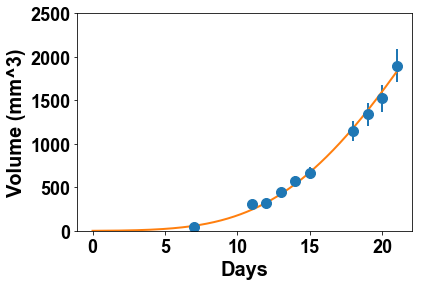

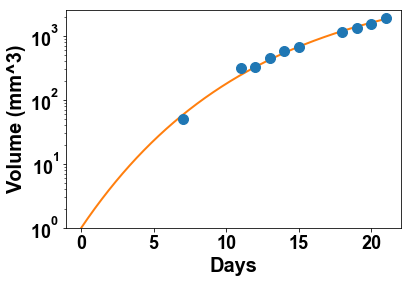

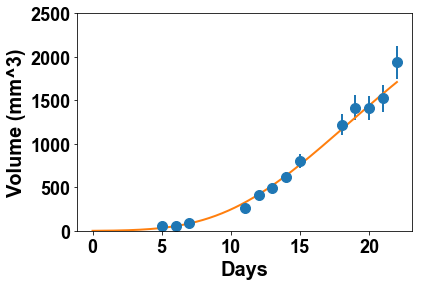

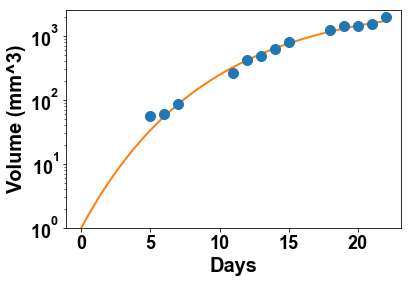

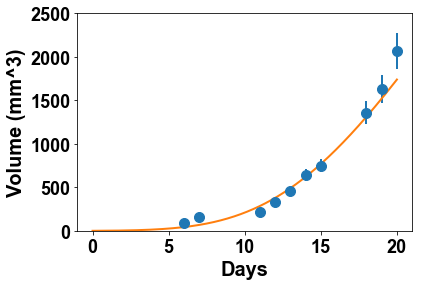

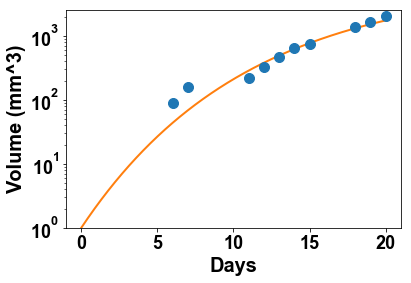

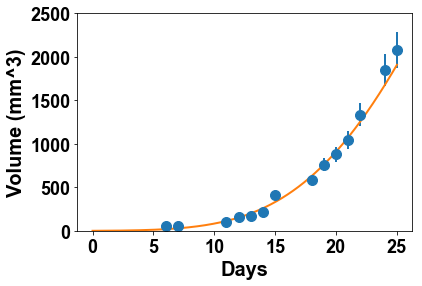

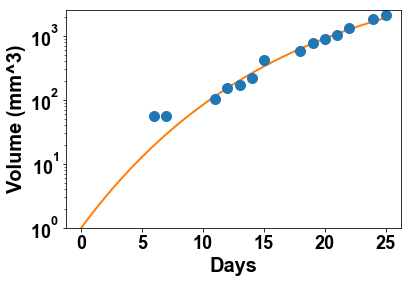

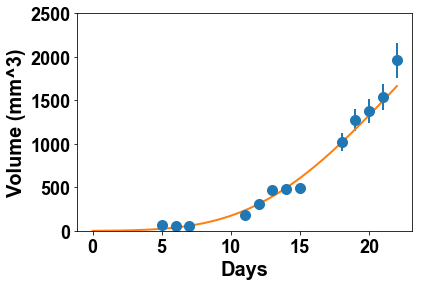

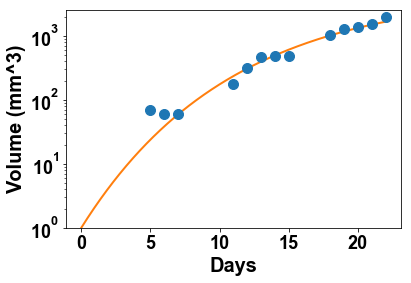

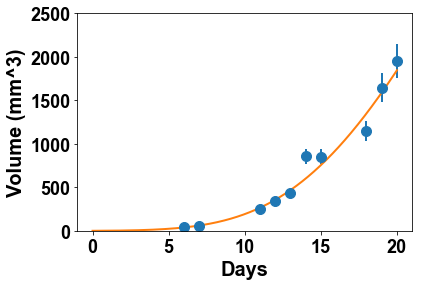

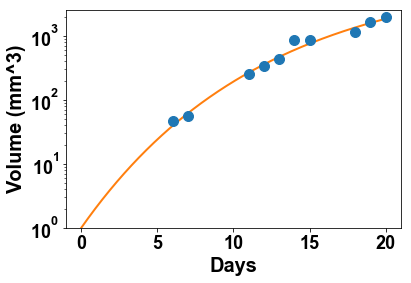

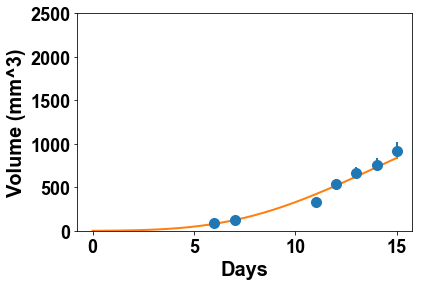

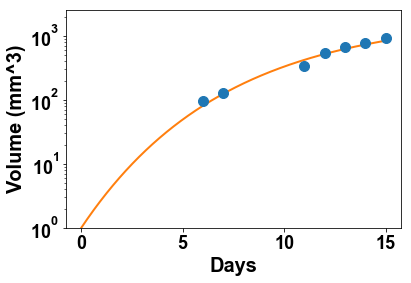

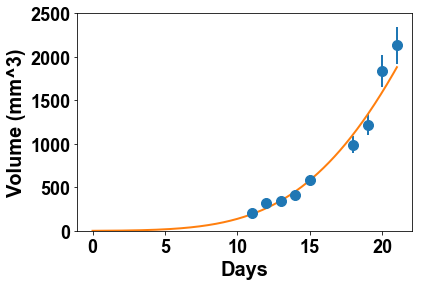

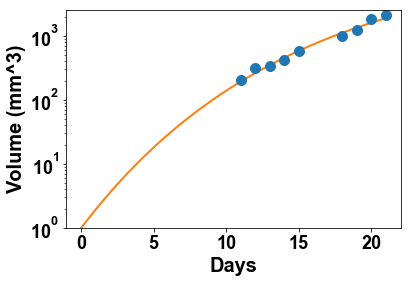

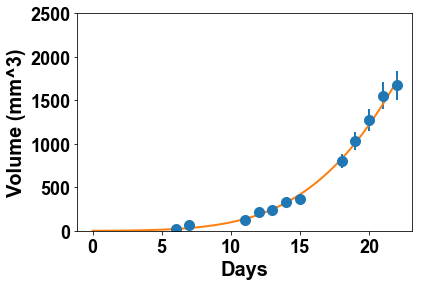

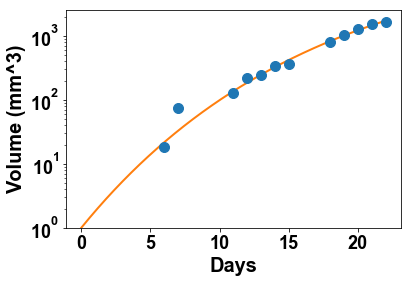

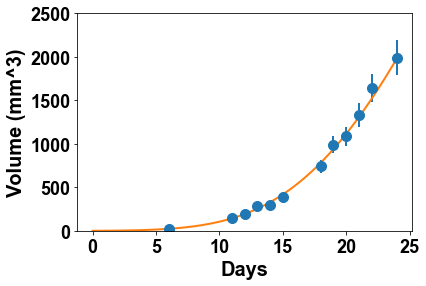

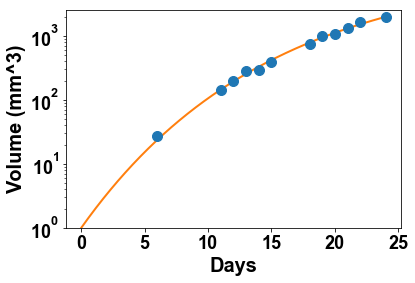

In [46]:
fit_all_mice(gompertz, [0.1, 0.01])

Assess then the standard errors

In [47]:
results = fit_all_mice_analysis(gompertz, [0.1, 0.01])
print(results['rel_standard_errors'])

[[4.15 5.08]
 [4.49 5.19]
 [14.5 17.8]
 [10 12.9]
 [9.25 11.1]
 [6.05 7.55]
 [8.13 9.43]
 [6.58 8.43]
 [8.45 11.2]
 [2.9 3.66]]


/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.


## 2.5 The power law model as a simple and biologically interpretable model
Although widely employed due to its excellent descriptive power, one of the main criticism addressed to the Gompertz model is its lack of biological ground. Indeed, while the parameter $\alpha_0$ can be interpreted from the duration of the cell cycle, the parameter $\beta$ remains heuristic. It is not a physiological parameter that could be experimentally measured and can only be assessed through fitting the growth curve. 

The **power law** model is yet another model which consists in assuming that the proliferative tissue – instead of being a constant fraction of the tumor volume as in the exponential model – is rather proportional to the volume of the tumor elevated to a power $\gamma$. This power (or rather the triple of it) can be interpreted as the fractal (Hausdorff) dimension of the proliferative tissue. For example, when $\gamma=\frac{2}{3}$ then the proliferative tissue would only be two-dimensional within a three-dimensional tumor. This could correspond to a proliferative rim limited to the surface of the tumor, and would make sense because the vascularization of a tumor often occurs through its surface. However, an active process of tumor-driven vasculature development (the tumor **neo-angiogenesis**) induces the growth of new infiltrative blood vessels. From the naturall tree structure of the blood network, a fractal dimension naturally occurs and the proliferative tissue, being in the vicinity of the blood vessels, inherits this dimension. Summing up, this gives the following simple differential equation which can, once again, be solved analytically:
$$
\left\lbrace\begin{array}{l}
\frac{dV}{dt} = \alpha V^\gamma\\
V(t=0) = 1
\end{array}
\right.
\quad 
\Longrightarrow
\quad
V(t) = (1 + \alpha (1-\gamma) t)^{\frac{1}{1-\gamma}}.
$$

In the case of $\gamma=\frac{2}{3}$, show that growth of the tumor radius is linear in time. This patterns is experimentally and clinically observed in many situations, including the growth of gliomas.

Use the following function to fit the model (initial guess $\alpha = 0.2, \; \gamma = 0.7$) to the data and assess the identifiability of its parameters. What value do you estimate for the fractal dimension of the vasculature in this data set?

In [57]:
def power_law(time, alpha, gamma):
    VI = 1
    V  = (VI**(1-gamma)+alpha*(1-gamma)*time)**(1./(1-gamma))
    return V

/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


[0.992 0.768]
[1.48 0.679]
[1.36 0.704]
[0.776 0.782]
[1.18 0.718]
[0.975 0.782]
[1.71 0.67]
[0.887 0.79]
[0.7 0.828]
[0.805 0.788]


/Users/benzekry/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


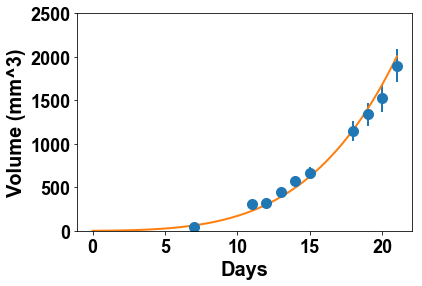

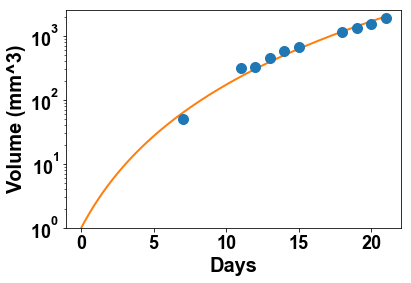

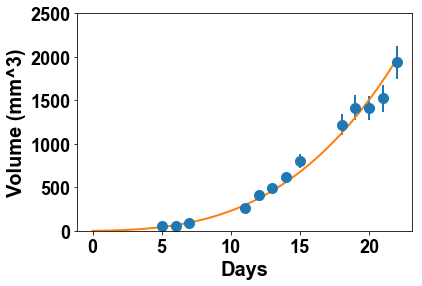

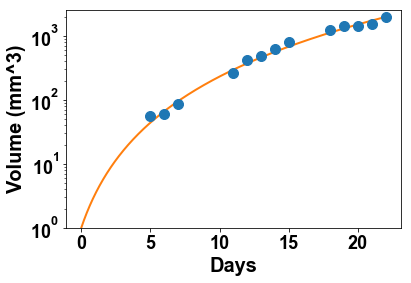

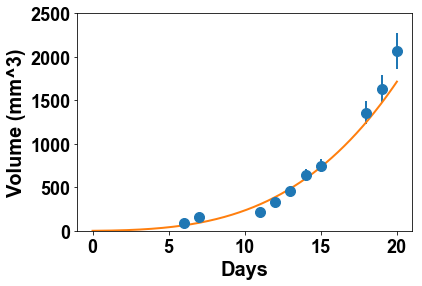

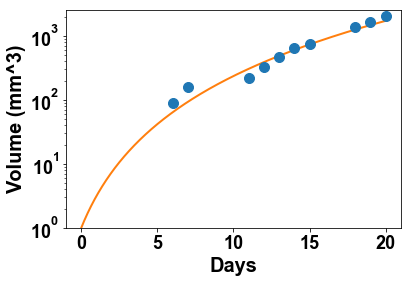

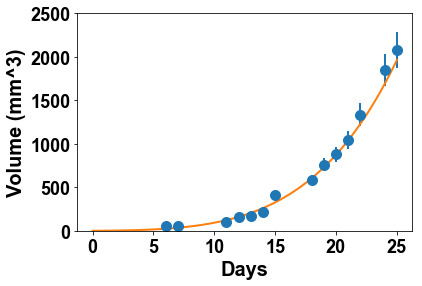

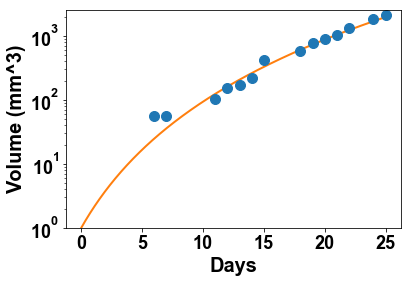

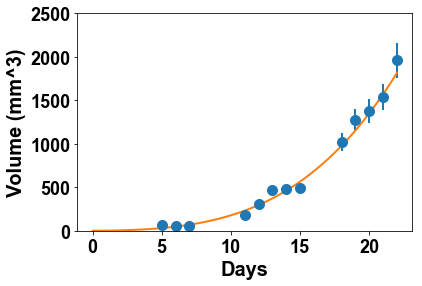

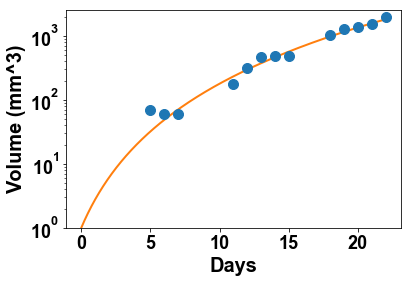

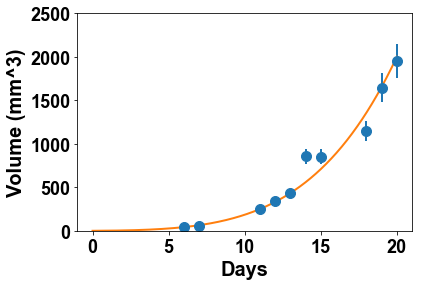

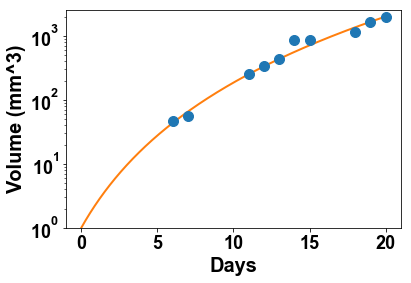

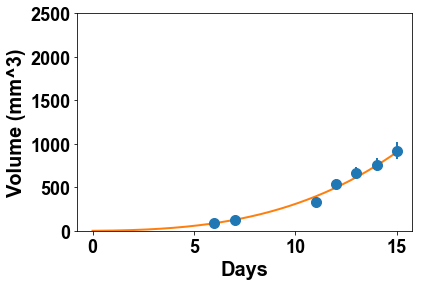

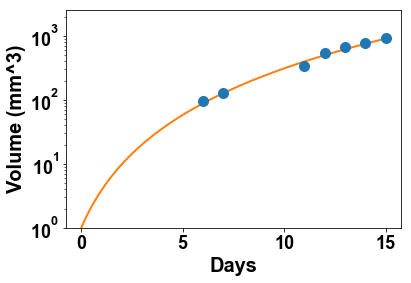

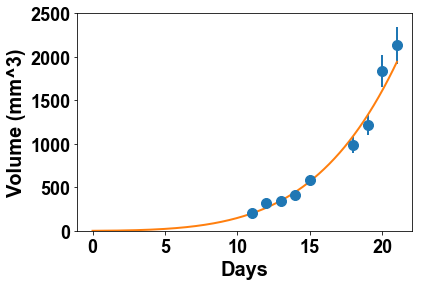

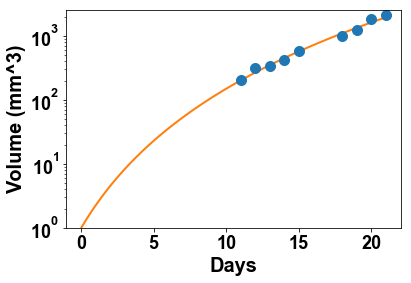

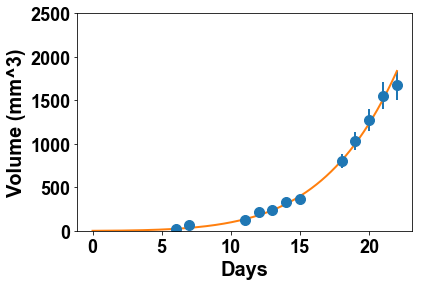

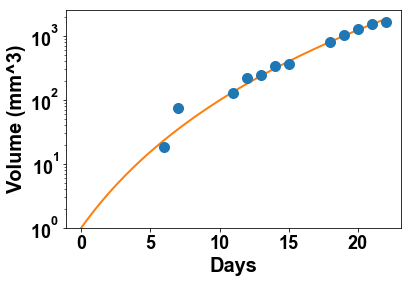

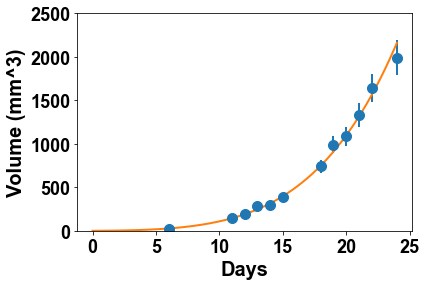

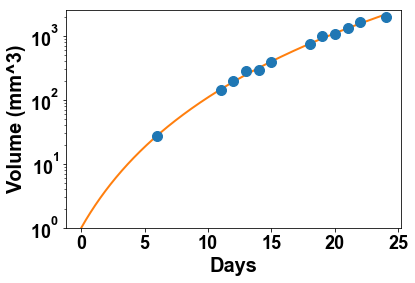

In [56]:
fit_all_mice(power_law, [0.2, 0.7])

In [59]:
results    = fit_all_mice_analysis(power_law, [0.2, 0.7])
print(results['rel_standard_errors'])
gamma_mean = np.mean(results['popts'][:, 1])
gamma_std  = np.std(results['popts'][:, 1])
print('Mean gamma = %.3g' %gamma_mean)
print('Std gamma = %.3g' %gamma_std)

[[8.15 2.57]
 [6.07 2.09]
 [19 6.52]
 [10.4 3.43]
 [11.1 3.78]
 [7.74 2.5]
 [10.1 3.8]
 [7.48 2.33]
 [7.86 2.52]
 [2.78 0.888]]
Mean gamma = 0.751
Std gamma = 0.051


/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


## Goodness-of-fit metrics
So far, we have only analyzed goodness-of-fit visually. While this is an important step in any fitting exercise, there exists quantitative metrics allowing to score the descriptive power and rank models. The first one would be the optimal likelihood obtained from the fit. In our simplified case, it reduces to the sum of the squared errors between the model and the data:
$$
SSE = \sum_{j= 1}^{n}\left( \frac{V_j - V(t_j,\theta)}{ V_j}\right)^2.
$$
However, this metric does not account for the number of parameters in the model, which makes it easier to fit. To do so, two metrics that penalize the number of parameters exist: the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). They are defined by:
$$
AIC = n\ln\left(\frac{SSE}{n}\right) +2 p, \quad BIC = n\ln\left(\frac{SSE}{n}\right) + p\ln(n). 
$$
Modify the function ``fits_all_mice_analysis`` to compute these quantities (for each mouse) and output them in arrays ``SSEs``, ``AICs`` and ``BICs`` in the ``results`` dictionary.

Then use this function to construct a dataframe with models as index and mean scores as columns.

In [79]:
model_fs         = [exponential, exponential_V0, logistic, generalized_logistic, gompertz, power_law]
param0s          = [[0.1], [0.1, 10], [0.5, 5000], [0.5, 5000, 0.1], [0.1, 0.01], [0.2, 0.7]]
model_names      = ['exponential', 'exponential_V0', 'logistic', 'generalized_logistic', 'gompertz', 'power_law']
df_models_scores = pd.DataFrame(index=model_names, columns=['mSSE', 'mAIC', 'mBIC'])
for (model_f, param0, model_name) in zip(model_fs, param0s, model_names):
    results                                  = fit_all_mice_analysis(model_f, param0)
    df_models_scores.loc[model_name, 'mSSE'] = np.mean(results['SSEs'])
    df_models_scores.loc[model_name, 'mAIC'] = np.mean(results['AICs'])
    df_models_scores.loc[model_name, 'mBIC'] = np.mean(results['BICs'])
df_models_scores = df_models_scores.applymap(lambda x: '%.3g' %x)
df_models_scores

/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
/Users/benzekry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  a

mSSE   mAIC   mBIC
exponential              79   20.6     21
exponential_V0         0.73    -30  -29.2
logistic               10.5  -5.09  -4.33
generalized_logistic    1.4  -26.9  -25.7
gompertz                1.4  -28.6  -27.8
power_law             0.669  -33.7  -32.9